In [1]:
import pandas as pd
import numpy  as np
import sqlite3
import streamlit as st
import seaborn as sns
import matplotlib.pyplot as plt

# Conectar a la base de datos SQLite
conn = sqlite3.connect(r'C:\Users\DELL\OneDrive\Documentos\kadija\SALUD MENTAL EN LA INDUSTRIA TECNOLÓGICA 1 (4).sqlite')

cur = conn.cursor()

In [2]:
# Consultar las tablas en la base de datos
consulta_ntablas = "SELECT name FROM sqlite_master WHERE type='table' ORDER BY name;"


# Mostrar las entidades
print("Entidades en la base de datos:")
entidades = pd.read_sql_query(sql = consulta_ntablas, con = conn)
entidades

Entidades en la base de datos:


,name
0,Answer
1,Question
2,Respuestas
3,Survey


In [3]:
# Crear consulta para convertir en DF
consulta = "SELECT * FROM Respuestas;"

df_Respuestas = pd.read_sql_query(sql = consulta, con = conn)

conn.close()

In [4]:
# Filtrado del DF por el año 2016 y Estados Unidos como País para realizar la Investigación
User_ID = df_Respuestas[(df_Respuestas['QuestionID'] == 3) & (df_Respuestas['AnswerText'] == 'Estados Unidos')]['UserID'].unique()

df_Investigacion = df_Respuestas[(df_Respuestas['UserID'].isin(User_ID)) & (df_Respuestas['SurveyID'] == 2016)]

In [5]:
# Reestructuración del DF para mejor uso de Pandas
df_Investigacion = df_Investigacion.groupby(['UserID', 'QuestionID'])['AnswerText'].first().reset_index()

df_Investigacion = df_Investigacion.pivot_table(index='UserID', columns='QuestionID', values='AnswerText', aggfunc='first')

In [6]:
# Renombrar las variables
print(df_Investigacion.columns)

df_Investigacion.columns = ['Edad', 'Género', 'País de Residencia', 'Ciudad de Residencia (EEUU)', 'Trabajo Autónomo', 'Historial Familiar', 'Búsqueda de Tratamiento con un Profesional', 'Cantidad de Empleados en la Empresa', 'Beneficios Dentro de Seguro Médico', 'Problemas de Salud Mental en Entrevista Laboral', 'Conocimiento de las Opciones de Cobertura por la Empresa Actual', 'Recursos de la Empresa Para Conocer sobre la Salud Mental y Canales de Ayuda', 'Facilidad de Consulta de Baja Médica en el Trabajo', 'Comodidad para Hablar de una Enfermedad Mental con Compañeros de Trabajo', 'Comodidad para Hablar de una Enfermedad Mental con un Director/Supervisor', 'Cobertura de Salud Mental en Seguro Médico', 'Beneficios de Salud Mental de Empleos Anteriores', 'Conocimiento de las Opciones de Ayuda por el Empleo Anterior', 'Protección de Anonimato Si Se Toma Ventaja de los Recursos de Tratamiento en Empleos Anteriores', 'Disposición de Hablar de Salud Mental con un Supervisor', 'Disposición para Hablar Sobre Enfermedad Mental con Familia/Amigos', 'Seguridad de Revelar Enfermedad Mental Debido a Comentario Sobre Salud Mental de Otra Persona', 'Situación Mental Actual', '¿Alguna Vez Has Sido Diagnosticado con una Enfermedad Mental?', 'Nivel de Interferencia en el Trabajo Cuando Se Está Bajo Tratamiento', 'Nivel de Interferencia en el Trabajo Cuando No Se Está Bajo Tratamiento', 'Disposición a Revelar Enfermedad Mental a Empleados/Compañeros', 'Productividad Afectada Por Enfermedad Mental', 'Porcentaje de Tiempo Afectada Por Enfermedad Mental', '¿Has Observado o Experimentado una Respuesta Insolidaria o Mal Gestionada a un Problema de Salud Mental en tu Lugar de Trabajo Actual o Anterior?', '¿Cree que los Miembros de su Equipo/Compañeros de Trabajo le Verían de Forma más Negativa Si Supieran que Padece una Enfermedad Mental?', 'Enfermedades Mentales Diagnosticadas', 'Enfermedades Mentales No Diagnosticadas', 'Puesto de Trabajo', 'Trabajo Remoto']

Index([  1,   2,   3,   4,   5,   6,   7,   8,  10,  12,  14,  16,  17,  18,
        19,  20,  23,  24,  27,  28,  30,  31,  33,  34,  48,  49,  53,  54,
        55,  56, 114, 115, 116, 117, 118],
      dtype='int64', name='QuestionID')


In [7]:
# Reemplazar los NaN

df_Investigacion = df_Investigacion.fillna('No respondió')

Investigacion = df_Investigacion

In [8]:
# Título de la aplicación
st.title("Problemáticas y Estigmas de las Enfermedades Mentales en la Industria Tecnológica Estadounidense en el Año 2016")

st.dataframe(df_Investigacion)

# Título de la aplicación
st.title("Análisis del Conjunto de Datos Iris")

st.write("""
## Introducción

El conjunto de datos **Iris** es uno de los conjuntos de datos más conocidos en la comunidad de ciencia de datos. Este conjunto de datos fue introducido por el biólogo y estadístico británico Ronald A. Fisher en su artículo de 1936 "The use of multiple measurements in taxonomic problems". El conjunto de datos contiene 150 observaciones de iris con cuatro características: longitud del sépalo, anchura del sépalo, longitud del pétalo y anchura del pétalo. Además, cada observación pertenece a una de las tres especies de iris: Iris setosa, Iris versicolor o Iris virginica.

En esta aplicación, exploraremos el conjunto de datos Iris mediante gráficos y estadísticas descriptivas. A continuación, se muestra una tabla con las primeras filas del conjunto de datos.
""")

2024-06-21 20:36:03.062 
  command:

    streamlit run C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [9]:
# PREGUNTA #1
#¿Cuántas personas en la industria tecnológica tienen una enfermedad mental diagnosticada y, dentro de este grupo, existe algún historial familiar dentro de este ámbito?

Pregunta1 = pd.crosstab(df_Investigacion['¿Alguna Vez Has Sido Diagnosticado con una Enfermedad Mental?'], 
                        df_Investigacion['Historial Familiar'], 
                        margins=True, 
                        margins_name='Total')

Pregunta1.columns.name = 'Historial Familiar'
Pregunta1.index.name = '¿Alguna Vez Has Sido Diagnosticado con una Enfermedad Mental?'

st.write("Tabla de Contingencia")
st.write(Pregunta1)


In [11]:
# Contar el número total de personas en la empresa
total_personas = df_Investigacion.shape[0]

# Filtrar el DataFrame para obtener solo las respuestas de enfermedad mental
df_mental_health = df_Investigacion[df_Investigacion['situacion_mental_actual'].notna()]

# Contar el número de personas en la empresa que respondieron a la pregunta de enfermedad mental
num_personas_mental_health = df_mental_health.shape[0]

print(f"Total de personas en la empresa: {total_personas}")
print(f"Número de personas en la empresa que respondieron a la pregunta de enfermedad mental: {num_personas_mental_health}")

df = df_Investigacion[['situacion_mental_actual', 'cantidad_de_personas_en_la_empresa']]

df['Cantidad de Empleados en la Empresa'] = df['Cantidad de Empleados en la Empresa'].astype(str)
df['rango_de_personas'] = pd.cut(df['Cantidad de Empleados en la Empresa'], bins=[0, 5, 25, 100, 500, 1000, np.inf], labels=['1-5', '6-25', '26-100', '100-500', '501-1000', 'mas de 1000'])
df.groupby('rango_de_personas').size()



KeyError: 'situacion_mental_actual'

In [13]:
# ¿Si Expresas que posees una Enfermedad Mental crees que en tu ambiente de Trabajo seria tomado de Mala manera?
Pregunta_5 = df_Investigacion['¿Has Observado o Experimentado una Respuesta Insolidaria o Mal Gestionada a un Problema de Salud Mental en tu Lugar de Trabajo Actual o Anterior?'].value_counts().to_frame('Posee Enfermedad Mental Diagnosticada')

Pregunta_5 = Pregunta_5.rename(columns={'count': 'Posee Enfermedad Mental Diagnosticada'})

print(Pregunta_5)

                                                    Posee Enfermedad Mental Diagnosticada
¿Has Observado o Experimentado una Respuesta In...                                       
No                                                                                    341
Tal vez/No estoy seguro(a)                                                            215
Si, lo he visto                                                                       155
Si, me ha pasado                                                                       89
No respondió                                                                           39


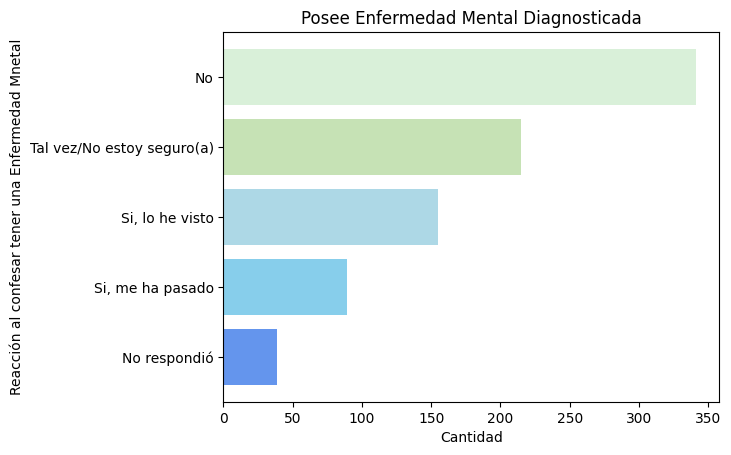

In [44]:
import matplotlib.colors as mcolors
# Create an array of colors with a gradient
colors = np.array(['#6495ED', '#87CEEB', '#ADD8E6', '#C6E2B5', '#D9F0D9'])

# Sort the values and indices of Pregunta_5 in descending order
sorted_indices = Pregunta_5['Posee Enfermedad Mental Diagnosticada'].sort_values(ascending=False).index
sorted_values = Pregunta_5['Posee Enfermedad Mental Diagnosticada'].sort_values(ascending=False)

# Reverse the order of the sorted indices and values
sorted_indices = sorted_indices[::-1]
sorted_values = sorted_values[::-1]

# Create the colors gradient (use the sorted indices to select the colors)
colors_grad = [colors[i % len(colors)] for i in range(len(sorted_values))]

# Create the horizontal bar chart
plt.barh(sorted_indices, sorted_values, color=colors_grad)

# Add labels, title, etc.
plt.xlabel('Cantidad')
plt.ylabel('Reacción al confesar tener una Enfermedad Mnetal')
plt.title('Posee Enfermedad Mental Diagnosticada')

# Show the chart
plt.show()

In [ ]:
# Pregunta 2
# ¿Cuáles son las 5 enfermedades más comunes de los encuestados según el estado donde residen? ¿Cambiaría este ranking si se toma en cuenta la edad y el genero? 
pregunta_2 = df_Investigacion[df_Investigacion['Enfermedades Mentales Diagnosticadas']!= 'No respondió'].groupby('Ciudad de Residencia (EEUU)')['Enfermedades Mentales Diagnosticadas'].value_counts().nlargest(5).reset_index(name='Frecuencia')

pregunta_2 = pregunta_2.loc[:, ['Enfermedades Mentales Diagnosticadas', 'Ciudad de Residencia (EEUU)', 'Frecuencia']]  # Reordenar columnas

pregunta_2.columns = ['Enfermedades Mentales Diagnosticadas', 'Ciudad de Residencia (EEUU)', 'Cantidad de personas']  # Renombrar columnas

print(pregunta_2.to_string(header=True, index=False))

                               Enfermedades Mentales Diagnosticadas Ciudad de Residencia (EEUU)  Cantidad de personas
           Trastorno de Ansiedad (Genralizado, Social, Fobia, etc.)                  California                    34
Trastorno del Estado del Ánimo (Depresión, Trastorno Bipolar, etc.)                  California                    19
           Trastorno de Ansiedad (Genralizado, Social, Fobia, etc.)                    Illinois                    18
           Trastorno de Ansiedad (Genralizado, Social, Fobia, etc.)                 Pensilvania                    16
           Trastorno de Ansiedad (Genralizado, Social, Fobia, etc.)                  Nueva York                    13


In [ ]:
# Parte 3, pregunta 2
Pregunta2_3 = df_Investigacion.groupby(['Enfermedades Mentales Diagnosticadas', 'Género']).size().reset_index(name='Cantidad de personas')

Pregunta2_3 = Pregunta2_3[Pregunta2_3['Género']!= 'No respondió']  # Eliminar "No respondió" de la columna "Género"

top_5_enfermedades = Pregunta2_3.groupby('Enfermedades Mentales Diagnosticadas')['Cantidad de personas'].sum().nlargest(6).index

Pregunta2_3 = Pregunta2_3[Pregunta2_3['Enfermedades Mentales Diagnosticadas'].isin(top_5_enfermedades)]

Pregunta2_3 = Pregunta2_3[Pregunta2_3['Enfermedades Mentales Diagnosticadas']!= 'No respondió']

Pregunta2_3 = Pregunta2_3.pivot_table(index='Enfermedades Mentales Diagnosticadas', columns='Género', values='Cantidad de personas', fill_value=0)

print(Pregunta2_3)